# 타이타닉 데이터 분석

## 함수 정리

### value_counts(normalize=True)

In [ ]:
### value_counts(normalize=True) : 항목별 비율 추출

# 필요한 라이브러리 import
import seaborn as sns
import pandas as pd

# 데이터 생성
df_tips = sns.load_dataset('tips')

# 결과 확인하기
print(df_tips)

print('-'*80)

# day 컬럼 --> 항목별 빈도수 추출 --> value_counts()
day_counts = df_tips.loc[:,'day'].value_counts()
print(f'day컬럼의 항목별 빈도수 : \n{day_counts}')

print('-'*80)

# day 컬럼 --> 항목별 비율 추출 --> value_counts(normalize=True)
day_ratio = df_tips.loc[:,'day'].value_counts(normalize=True)
print(f'day컬럼의 항목별 비율 : \n{day_ratio}')

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
--------------------------------------------------------------------------------
day컬럼의 항목별 빈도수 : 
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
--------------------------------------------------------------------------------
day컬럼의 항목별 비율 : 
Sat     0.356557
Sun     0.

### apply() 사용

In [ ]:
### 사용자 정의 함수 --> 데이터프레임 / 시리즈 데이터에 적용

'''
1. df,apply(func)
2.df.loc[:,'col'].apply(func)
'''

# DataFrame 자료형 생성
data = {'A':[4,1,5],
        'B':[9,4,6]}

df = pd.DataFrame(data=data)
print(df)

print('-'*80)

# plus_one 함수 정의 --> 사용자 정의 함수
def plus_one(x):
    return x+1

# pandas에서 제공하지 않는 함수 --> df.func() --> 불가능 (에러 발생)
# df.apply(func) --> 가능
df = df.apply(plus_one)
print(df)

print('-'*80)

# 특정 컬럼 --> df.loc[:,'col'].apply(func)
df.loc[:,'A'] = df.loc[:,'A'].apply(plus_one)
print(df)

   A  B
0  4  9
1  1  4
2  5  6
--------------------------------------------------------------------------------
   A   B
0  5  10
1  2   5
2  6   7
--------------------------------------------------------------------------------
   A   B
0  6  10
1  3   5
2  7   7


### apply(lambda)

In [ ]:
# 사용 데이터 --> df
print(df)

print('-'*80)

# DataFrame --> apply(lambda) 적용
df = df.apply(lambda x:x+1)
print(df)

   A   B
0  6  10
1  3   5
2  7   7
--------------------------------------------------------------------------------
   A   B
0  7  11
1  4   6
2  8   8


## 데이터 불러오기

In [ ]:
### 필요한 라이브러리 import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### 데이터 불러오기

# 파일 경로 설정
train_path = '/content/drive/MyDrive/데이터 분석/titanic_train.csv'
test_path = '/content/drive/MyDrive/데이터 분석/titanic_test.csv'

# pd.read_csv() --> DataFrame 자료형 생성
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# 결과 확인하기
print(df_train)
print('-'*80)
print(df_test)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
### 학습용 데이터와 평가용 데이터의 컬럼 비교
print(df_train.columns == df_test.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True]


In [ ]:
### 데이터 병합하기
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

# ignore_index --> pandas version 문제로 작동(X) --> df.reset_index(drop=True, inplace=True) 사용

# 결과 확인하기
print(df)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

### 데이터 전처리

#### 누락 데이터 처리

In [ ]:
### 각 컬럼별 누락 데이터 확인

# isnull() --> 각 컬럼별 누락 여부 확인
df_bool = df.isnull()
print(df_bool)

print('-'*80)

# isnull().sum() --> 각 컬럼별 누락 데이터의 수 확인
num_nulls = df_bool.sum()
print(num_nulls)

      PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  \
0           False     False   False  False   False  False  False  False   
1           False     False   False  False   False  False  False  False   
2           False     False   False  False   False  False  False  False   
3           False     False   False  False   False  False  False  False   
4           False     False   False  False   False  False  False  False   
...           ...       ...     ...    ...     ...    ...    ...    ...   
1304        False     False   False  False   False   True  False  False   
1305        False     False   False  False   False  False  False  False   
1306        False     False   False  False   False  False  False  False   
1307        False     False   False  False   False   True  False  False   
1308        False     False   False  False   False   True  False  False   

      Ticket   Fare  Cabin  Embarked  
0      False  False   True     False  
1      False  False  

##### Cabin 컬럼

In [ ]:
### Cabin 컬럼 제거 --> df.drop(columns=['col'])
cleaned_df = df.drop(columns=['Cabin'])

# 결과 확인하기
print(cleaned_df)

      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

##### Age 컬럼

In [ ]:
### Age 컬럼 값의 분포 확인 --> 요약 통계량 --> describe()
print(cleaned_df.loc[:,'Age'].describe())

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


In [ ]:
### Age 컬럼 --> 최빈값 추출 --> 변수(series).mode() / 변수(series).value_counts()
counts = cleaned_df.loc[:,'Age'].value_counts()
print(f'Age 컬럼의 항목별 빈도수 : \n{counts.iloc[:10]}')

Age 컬럼의 항목별 빈도수 : 
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
25.0    34
28.0    32
36.0    31
29.0    30
27.0    30
Name: Age, dtype: int64


In [ ]:
### Age 컬럼 --> 누락 데이터 --> 중간값으로 대체
age_median = cleaned_df.loc[:,'Age'].median()
cleaned_df.loc[:,'Age'].fillna(age_median, inplace=True)

# 중간값으로 대체 후 누락 데이터의 수 확인
print(cleaned_df.loc[:,'Age'].isnull().sum())


0


###### Binning

In [ ]:
### Age 컬럼 --> 8단계 구간화

# pd.cut() 함수 사용 --> 매개 변수 설정
x = cleaned_df.loc[:,'Age']
bins = 8
labels = [0, 1, 2, 3, 4, 5, 6, 7]

# 데이터 변환
cleaned_df.loc[:,'Age'] = pd.cut(x=x, bins=bins, labels=labels)

# 결과 확인하기
print(f'전체 데이터 확인 : \n{cleaned_df}')

전체 데이터 확인 : 
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender Age  SibSp  \
0                               Braund, Mr. Owen Harris    male   2      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   3      1   
2                                Heikkinen, Miss. Laina  female   2      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   3      1   
4                              Allen, Mr. William Henry    male   3      0   
...                                               

##### Embarked 컬럼

In [ ]:
### 승선 항구의 항구별 빈도수 / 비율 추출

# 빈도수 추출
counts = cleaned_df.loc[:,'Embarked'].value_counts()
print(f'승선 항구의 항구별 빈도수 : \n{counts}')

print('-'*80)

# 비율 추출
ratio = cleaned_df.loc[:,'Embarked'].value_counts(normalize=True)
print(f'승선 항구의 항구별 비율 : \n{ratio}')

승선 항구의 항구별 빈도수 : 
S    914
C    270
Q    123
Name: Embarked, dtype: int64
--------------------------------------------------------------------------------
승선 항구의 항구별 비율 : 
S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64


In [ ]:
### 누락 데이터 처리 --> 최빈값으로 채우기
cleaned_df.loc[:,'Embarked'].fillna('S', inplace=True)

# 결과 확인하기
print(cleaned_df.loc[:,'Embarked'].isnull().sum())

0


##### Fare 컬럼

In [ ]:
### Fare 컬럼의 항복별 빈도수 확인
print(cleaned_df.loc[:,'Fare'].value_counts(normalize=True))

8.0500     0.045872
13.0000    0.045107
7.7500     0.042049
26.0000    0.038226
7.8958     0.037462
             ...   
7.7417     0.000765
8.1583     0.000765
8.4583     0.000765
7.8000     0.000765
7.7208     0.000765
Name: Fare, Length: 281, dtype: float64


In [ ]:
### Fare 컬럼에서 누락 데이터 확인 --> 불리언 배열 생성 --> loc[불리언배열,:]

# Fare 컬럼 --> 누락 여부 --> isnull() --> 불리언 배열 생성
condition = cleaned_df.loc[:,'Fare'].isnull()
print(condition)

print('-'*80)

# 불리언 배열 --> loc[condition, 열]
null = cleaned_df.loc[condition,:]
print(f'Fare 컬럼에서 누락된 데이터 확인 :\n{null}')

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1309, dtype: bool
--------------------------------------------------------------------------------
Fare 컬럼에서 누락된 데이터 확인 :
      PassengerId  Survived  Pclass                Name Gender Age  SibSp  \
1043         1044         0       3  Storey, Mr. Thomas   male   6      0   

      Parch Ticket  Fare Embarked  
1043      0   3701   NaN        S  


In [ ]:
### 3등석 & 승선 항구 S & SibSp 0 % Parch 0 --> 요금의 종류 확인
condition1 = cleaned_df.loc[:,'Pclass'] == 3
condition2 = cleaned_df.loc[:, 'Embarked'] == 'S'
condition3 = cleaned_df.loc[:, 'SibSp'] == 0
condition4 = cleaned_df.loc[:, 'Parch']  == 0
condition = condition1 & condition2 & condition3 & condition4

# 행의 조건을 만족하는 데이터 추출
data = cleaned_df.loc[condition, 'Fare']
print(f'4가지 조건을 모두 만족하는 승객의 요금 : \n{data}')
print('-'*80)
print(f'4가지 조건을 모두 만족하는 승객 요금의 요약 통계량 : \n{data.describe()}')
print('-'*80)
print(f'4가지 조건을 모두 만족하는 승객의 요금의 항목별 빈도수 : \n{data.value_counts()}')

4가지 조건을 모두 만족하는 승객의 요금 : 
2       7.9250
4       8.0500
12      8.0500
14      7.8542
29      7.8958
         ...  
1289    7.7750
1303    7.7750
1304    8.0500
1306    7.2500
1307    8.0500
Name: Fare, Length: 324, dtype: float64
--------------------------------------------------------------------------------
4가지 조건을 모두 만족하는 승객 요금의 요약 통계량 : 
count    323.000000
mean       9.593713
std        8.019326
min        0.000000
25%        7.775000
50%        7.895800
75%        8.050000
max       56.495800
Name: Fare, dtype: float64
--------------------------------------------------------------------------------
4가지 조건을 모두 만족하는 승객의 요금의 항목별 빈도수 : 
8.0500     59
7.8958     43
7.7750     23
7.8542     18
8.6625     18
           ..
7.8750      1
7.3125      1
6.2375      1
8.8500      1
39.6875     1
Name: Fare, Length: 62, dtype: int64


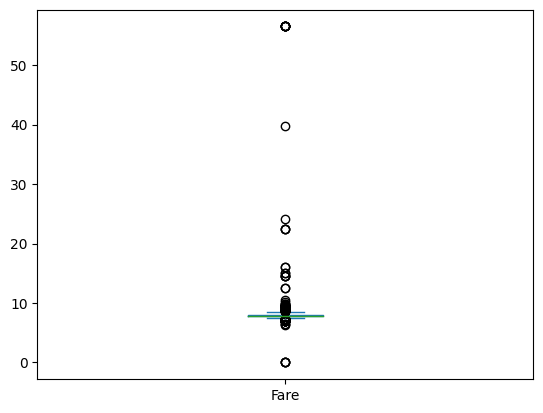

In [ ]:
### 4가지 조건을 모두 만족하는 요금 데이터 --> boxplot --> 이상치 확인
data.plot(kind='box')
plt.show()

정상 범위의 최소값 : 
7.3625
--------------------------------------------------------------------------------
정상 범위의 최대값 : 
8.462500000000002
--------------------------------------------------------------------------------
2       False
4       False
12      False
14      False
29      False
        ...  
1289    False
1303    False
1304    False
1306     True
1307    False
Name: Fare, Length: 324, dtype: bool
4가지 조건을 모두 만족하는 요금 데이터에서 이상치의 인덱스는 : 
Int64Index([  74,   79,   80,   81,   94,  103,  127,  129,  131,  138,
            ...
            1176, 1177, 1185, 1194, 1201, 1216, 1254, 1258, 1273, 1306],
           dtype='int64', length=116)
--------------------------------------------------------------------------------
첫번째 이상치 제거 후 남은 데이터 확인 : 
2       7.9250
4       8.0500
12      8.0500
14      7.8542
29      7.8958
         ...  
1277    7.7750
1289    7.7750
1303    7.7750
1304    8.0500
1307    8.0500
Name: Fare, Length: 208, dtype: float64
---------------------------------------------

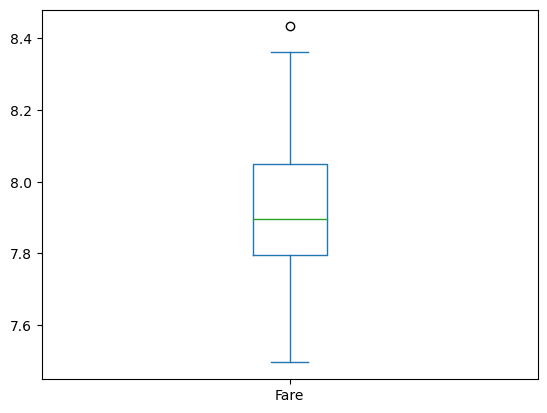

In [ ]:
### 4가지 조건을 모두 만족하는 요금 데이터 --> 이상치의 조건 확인

# 1사분위 값 / 3 사분위 값
q1 = data.quantile(q=0.25)
q3 = data.quantile(q=0.75)

# iqr 추출
iqr = q3 - q1

# 정상 범위의 최소
min = q1 - (1.5*iqr)
print(f'정상 범위의 최소값 : \n{min}')

print('-'*80)

# 정상 범위의 최대
max = q3 + (1.5*iqr)
print(f'정상 범위의 최대값 : \n{max}')

print('-'*80)

# 이상치의 인덱스 추출
condition = (data<min) | (data>max)
print(condition)
outlier_index = data.loc[condition].index
print(f'4가지 조건을 모두 만족하는 요금 데이터에서 이상치의 인덱스는 : \n{outlier_index}')

print('-'*80)

# 이상치 제거
cleaned_data = data.drop(index=outlier_index)
print(f'첫번째 이상치 제거 후 남은 데이터 확인 : \n{cleaned_data}')

print('-'*80)

# 첫번째 이상치 제거 후 남은 데이터 --> boxplot --> 이상치 확인
cleaned_data.plot(kind='box')
plt.show()

두번째 정상 범위의 최소값 : 
7.4144999999999985
--------------------------------------------------------------------------------
두번째 정상 범위의 최대값 : 
8.431300000000002
--------------------------------------------------------------------------------
2       False
4       False
12      False
14      False
29      False
        ...  
1277    False
1289    False
1303    False
1304    False
1307    False
Name: Fare, Length: 208, dtype: bool
4가지 조건을 모두 만족하는 요금 데이터에서 두번째 이상치의 인덱스는 : 
Int64Index([652], dtype='int64')
--------------------------------------------------------------------------------
첫번째 이상치 제거 후 남은 데이터 확인 : 
2       7.9250
4       8.0500
12      8.0500
14      7.8542
29      7.8958
         ...  
1277    7.7750
1289    7.7750
1303    7.7750
1304    8.0500
1307    8.0500
Name: Fare, Length: 207, dtype: float64
--------------------------------------------------------------------------------


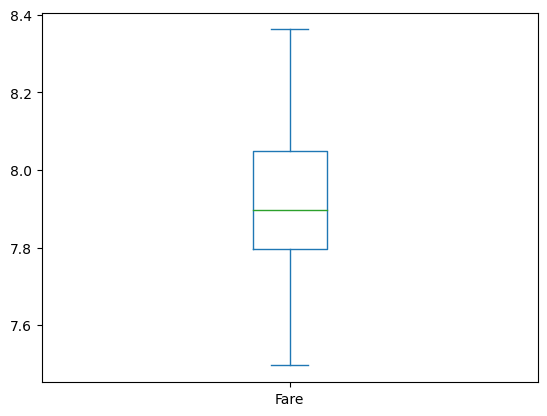

In [ ]:
# 두번째 1사분위 값 / 3 사분위 값
q1 = cleaned_data.quantile(q=0.25)
q3 = cleaned_data.quantile(q=0.75)

# iqr 추출
iqr = q3 - q1

# 정상 범위의 최소
min = q1 - (1.5*iqr)
print(f'두번째 정상 범위의 최소값 : \n{min}')

print('-'*80)

# 정상 범위의 최대
max = q3 + (1.5*iqr)
print(f'두번째 정상 범위의 최대값 : \n{max}')

print('-'*80)

# 이상치의 인덱스 추출
condition = (cleaned_data<min) | (cleaned_data>max)
print(condition)
outlier_index = cleaned_data.loc[condition].index
print(f'4가지 조건을 모두 만족하는 요금 데이터에서 두번째 이상치의 인덱스는 : \n{outlier_index}')

print('-'*80)

# 두번째 이상치 제거
cleaned_data2 = cleaned_data.drop(index=outlier_index)
print(f'첫번째 이상치 제거 후 남은 데이터 확인 : \n{cleaned_data2}')

print('-'*80)

# 두번째 이상치 제거 후 남은 데이터 --> boxplot --> 이상치 확인
cleaned_data2.plot(kind='box')
plt.show()

In [ ]:
### 이상치 제거 후 4가지 조건을 모두 만족하는 요금 데이터 --> 요약 통계량 추출
stats = cleaned_data2.describe()
print(stats)

count    206.000000
mean       7.892186
std        0.151203
min        7.495800
25%        7.795800
50%        7.895800
75%        8.050000
max        8.362500
Name: Fare, dtype: float64


In [ ]:
### 이상치 제거 후 4가지 조건을 모두 만족하는 요금 데이터 --> 요금별 빈도수 추출
counts = cleaned_data2.value_counts()
print(counts)

8.0500    59
7.8958    43
7.7750    23
7.8542    18
7.9250    17
7.7958    10
7.5500     8
7.6500     6
7.7500     5
7.4958     3
7.8875     2
8.1125     2
7.5792     1
7.5750     1
7.8500     1
8.3000     1
7.8750     1
8.3625     1
7.5208     1
8.1583     1
7.8000     1
7.8792     1
Name: Fare, dtype: int64


In [ ]:
### 누락 데이터 대체
price = 8.0
cleaned_df.loc[:,'Fare'].fillna(price, inplace=True)

# 결과 확인하기
print(cleaned_df.iloc[1043,:])

PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Gender                       male
Age                             6
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          8.0
Embarked                        S
Name: 1043, dtype: object


In [ ]:
### 이상치 처리 전 생존자 / 사망자 수 분포 확인

# 빈도수 확인
counts = cleaned_df.loc[:,'Survived'].value_counts()
print(f'이상치 처리 전 생존자 / 사망자 빈도수 확인 : \n{counts}')

print('-'*80)

# 비율 확인
ratio = cleaned_df.loc[:,'Survived'].value_counts(normalize=True)
print(f'이상치 처리 전 생존자 / 사망자 비율 확인 : \n{ratio}')

이상치 처리 전 생존자 / 사망자 빈도수 확인 : 
0    815
1    494
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
이상치 처리 전 생존자 / 사망자 비율 확인 : 
0    0.622613
1    0.377387
Name: Survived, dtype: float64


#### 이상치 처리

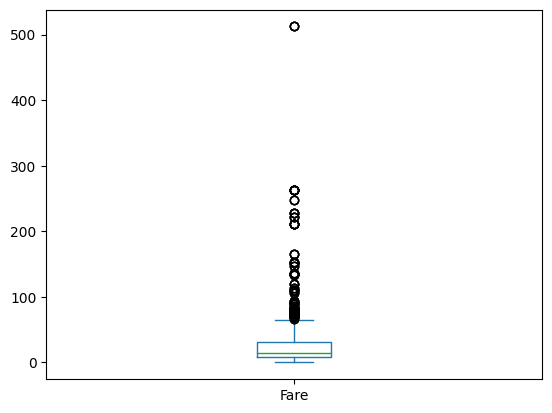

In [ ]:
### Fare 컬럼 --> boxplot --> 이상치 확인
cleaned_df.loc[:,'Fare'].plot(kind='box')
plt.show()

첫번째 정상 범위의 최대값 : 
-27.172999999999995
--------------------------------------------------------------------------------
첫번째 정상 범위의 최대값 : 
66.34379999999999
--------------------------------------------------------------------------------
첫번째 이상치 데이터의 불리언 배열 생성 : 
0       False
1        True
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: Fare, Length: 1309, dtype: bool
--------------------------------------------------------------------------------
첫번째 이상치 데이터의 인덱스 : 
Int64Index([   1,   27,   31,   34,   52,   61,   62,   72,   88,  102,
            ...
            1256, 1262, 1265, 1266, 1281, 1288, 1291, 1298, 1302, 1305],
           dtype='int64', length=171)
--------------------------------------------------------------------------------
첫번째 이상치 제거 후 남은 데이터 확인 : 
      PassengerId  Survived  Pclass  \
0               1         0       3   
2               3         1       3   
3               4     

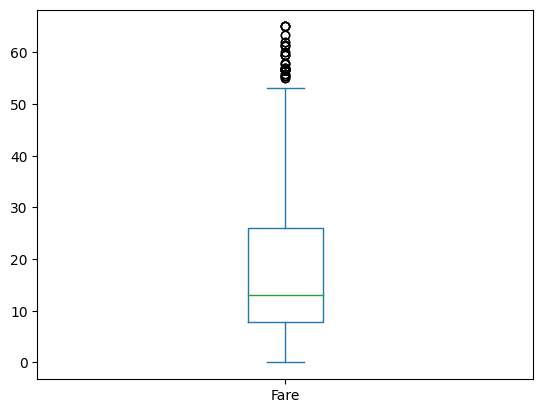

In [ ]:
### Fare 컬럼 --> 첫번째 이상치 확인 및 제거

# 1사분위 값 / 3 사분위 값
q1 = cleaned_df.loc[:,'Fare'].quantile(q=0.25)
q3 = cleaned_df.loc[:,'Fare'].quantile(q=0.75)

# 첫번째 iqr 추출
iqr = q3 - q1

# 첫번째 정상 범위의 최소
min = q1 - (1.5*iqr)
print(f'첫번째 정상 범위의 최대값 : \n{min}')

print('-'*80)

# 첫번째 정상 범위의 최대
max = q3 + (1.5*iqr)
print(f'첫번째 정상 범위의 최대값 : \n{max}')

print('-'*80)

# 첫번째 이상치 인덱스 추출
condition = (cleaned_df.loc[:,'Fare'] < min) | (cleaned_df.loc[:,'Fare'] > max)
print(f'첫번째 이상치 데이터의 불리언 배열 생성 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df.loc[:,'Fare'].loc[condition].index
print(f'첫번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 첫번째 이상치 제거
cleaned_df2 = cleaned_df.drop(index=outlier_index)
print(f'첫번째 이상치 제거 후 남은 데이터 확인 : \n{cleaned_df2}')

print('-'*80)

# 첫번째 이상치 제거 후 Fare 컬럼 --> boxplot --> 이상치 확인
cleaned_df2.loc[:,'Fare'].plot(kind='box')
plt.show()

두번째 정상 범위의 최대값 : 
-19.301999999999996
--------------------------------------------------------------------------------
두번째 정상 범위의 최대값 : 
53.1812
--------------------------------------------------------------------------------
두번째 이상치 데이터의 불리언 배열 생성 : 
0       False
2       False
3       False
4       False
5       False
        ...  
1303    False
1304    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1138, dtype: bool
--------------------------------------------------------------------------------
두번째 이상치 데이터의 인덱스 : 
Int64Index([  54,   74,   92,   97,  155,  166,  169,  309,  329,  356,  370,
             434,  509,  513,  523,  577,  599,  615,  643,  690,  692,  754,
             781,  826,  838,  905,  911,  914,  917,  925,  930,  941,  991,
            1013, 1068, 1121, 1241, 1244, 1255, 1259, 1276, 1286, 1293],
           dtype='int64')
--------------------------------------------------------------------------------
두번째 이상치 제거 후 남은 데이터 확인 : 
      Passenger

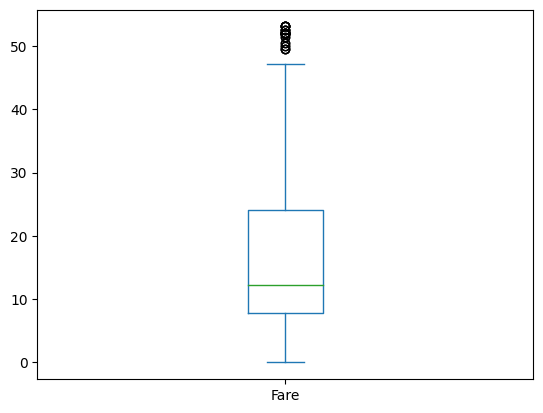

In [ ]:
### Fare 컬럼 --> 두번째 이상치 확인 및 제거

# 1사분위 값 / 3 사분위 값
q1 = cleaned_df2.loc[:,'Fare'].quantile(q=0.25)
q3 = cleaned_df2.loc[:,'Fare'].quantile(q=0.75)

# 두번째 iqr 추출
iqr = q3 - q1

# 두번째 정상 범위의 최소
min = q1 - (1.5*iqr)
print(f'두번째 정상 범위의 최대값 : \n{min}')

print('-'*80)

# 두번째 정상 범위의 최대
max = q3 + (1.5*iqr)
print(f'두번째 정상 범위의 최대값 : \n{max}')

print('-'*80)

# 두번째 이상치 인덱스 추출
condition = (cleaned_df2.loc[:,'Fare'] < min) | (cleaned_df2.loc[:,'Fare'] > max)
print(f'두번째 이상치 데이터의 불리언 배열 생성 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df2.loc[:,'Fare'].loc[condition].index
print(f'두번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 두번째 이상치 제거
cleaned_df3 = cleaned_df2.drop(index=outlier_index)
print(f'두번째 이상치 제거 후 남은 데이터 확인 : \n{cleaned_df3}')

print('-'*80)

# 두번째 이상치 제거 후 Fare 컬럼 --> boxplot --> 이상치 확인
cleaned_df3.loc[:,'Fare'].plot(kind='box')
plt.show()

세번째 정상 범위의 최대값 : 
-16.5895
--------------------------------------------------------------------------------
세번째 정상 범위의 최대값 : 
48.5937
--------------------------------------------------------------------------------
세번째 이상치 데이터의 불리언 배열 생성 : 
0       False
2       False
3        True
4       False
5       False
        ...  
1303    False
1304    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1095, dtype: bool
--------------------------------------------------------------------------------
세번째 이상치 데이터의 인덱스 : 
Int64Index([   3,    6,   35,  110,  137,  185,  248,  383,  457,  475,  493,
             539,  571,  621,  669,  671,  710,  712,  724,  748,  809,  867,
             871,  935,  983, 1037, 1057, 1073, 1136, 1247, 1269],
           dtype='int64')
--------------------------------------------------------------------------------
세번째 이상치 제거 후 남은 데이터 확인 : 
      PassengerId  Survived  Pclass                            Name  Gender  \
0               1         0    

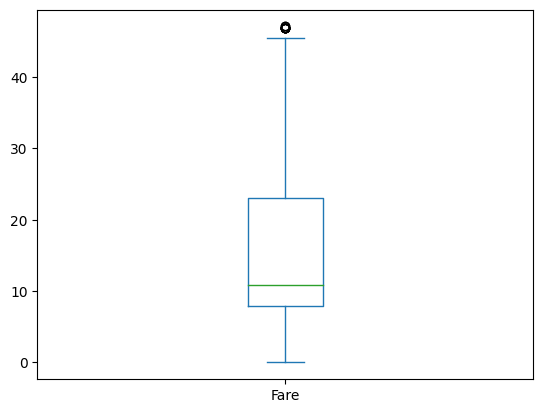

In [ ]:
### Fare 컬럼 --> 세번째 이상치 확인 및 제거

# 1사분위 값 / 3 사분위 값
q1 = cleaned_df3.loc[:,'Fare'].quantile(q=0.25)
q3 = cleaned_df3.loc[:,'Fare'].quantile(q=0.75)

# 세번째 iqr 추출
iqr = q3 - q1

# 세번째 정상 범위의 최소
min = q1 - (1.5*iqr)
print(f'세번째 정상 범위의 최대값 : \n{min}')

print('-'*80)

# 세번째 정상 범위의 최대
max = q3 + (1.5*iqr)
print(f'세번째 정상 범위의 최대값 : \n{max}')

print('-'*80)

# 세번째 이상치 인덱스 추출
condition = (cleaned_df3.loc[:,'Fare'] < min) | (cleaned_df3.loc[:,'Fare'] > max)
print(f'세번째 이상치 데이터의 불리언 배열 생성 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df3.loc[:,'Fare'].loc[condition].index
print(f'세번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 세번째 이상치 제거
cleaned_df4 = cleaned_df3.drop(index=outlier_index)
print(f'세번째 이상치 제거 후 남은 데이터 확인 : \n{cleaned_df4}')

print('-'*80)

# 세번째 이상치 제거 후 Fare 컬럼 --> boxplot --> 이상치 확인
cleaned_df4.loc[:,'Fare'].plot(kind='box')
plt.show()

네번째 정상 범위의 최대값 : 
-14.864500000000003
--------------------------------------------------------------------------------
네번째 정상 범위의 최대값 : 
45.7187
--------------------------------------------------------------------------------
네번째 이상치 데이터의 불리언 배열 생성 : 
0       False
2       False
4       False
5       False
7       False
        ...  
1303    False
1304    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1064, dtype: bool
--------------------------------------------------------------------------------
네번째 이상치 데이터의 인덱스 : 
Int64Index([59, 71, 83, 386, 480, 678, 683, 1030, 1031, 1294], dtype='int64')
--------------------------------------------------------------------------------
네번째 이상치 제거 후 남은 데이터 확인 : 
      PassengerId  Survived  Pclass                            Name  Gender  \
0               1         0       3         Braund, Mr. Owen Harris    male   
2               3         1       3          Heikkinen, Miss. Laina  female   
4               5         0      

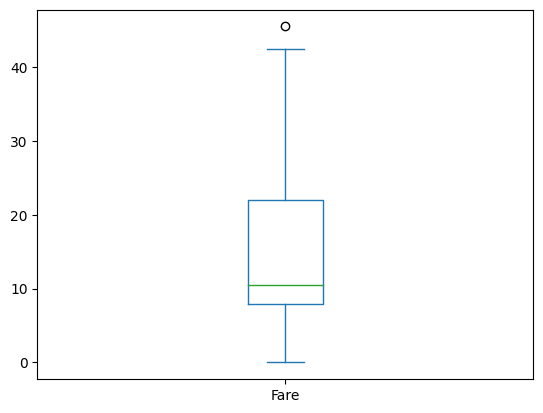

In [ ]:
### Fare 컬럼 --> 네번째 이상치 확인 및 제거

# 1사분위 값 / 3 사분위 값
q1 = cleaned_df4.loc[:,'Fare'].quantile(q=0.25)
q3 = cleaned_df4.loc[:,'Fare'].quantile(q=0.75)

# 네번째 iqr 추출
iqr = q3 - q1

# 네번째 정상 범위의 최소
min = q1 - (1.5*iqr)
print(f'네번째 정상 범위의 최대값 : \n{min}')

print('-'*80)

# 네번째 정상 범위의 최대
max = q3 + (1.5*iqr)
print(f'네번째 정상 범위의 최대값 : \n{max}')

print('-'*80)

# 네번째 이상치 인덱스 추출
condition = (cleaned_df4.loc[:,'Fare'] < min) | (cleaned_df4.loc[:,'Fare'] > max)
print(f'네번째 이상치 데이터의 불리언 배열 생성 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df4.loc[:,'Fare'].loc[condition].index
print(f'네번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 네번째 이상치 제거
cleaned_df5 = cleaned_df4.drop(index=outlier_index)
print(f'네번째 이상치 제거 후 남은 데이터 확인 : \n{cleaned_df5}')

print('-'*80)

# 네번째 이상치 제거 후 Fare 컬럼 --> boxplot --> 이상치 확인
cleaned_df5.loc[:,'Fare'].plot(kind='box')
plt.show()

5번째 정상 범위의 최대값 : 
-13.402000000000001
--------------------------------------------------------------------------------
5번째 정상 범위의 최대값 : 
43.2812
--------------------------------------------------------------------------------
5번째 이상치 데이터의 불리언 배열 생성 : 
0       False
2       False
4       False
5       False
7       False
        ...  
1303    False
1304    False
1306    False
1307    False
1308    False
Name: Fare, Length: 1054, dtype: bool
--------------------------------------------------------------------------------
5번째 이상치 데이터의 인덱스 : 
Int64Index([1189], dtype='int64')
--------------------------------------------------------------------------------
5번째 이상치 제거 후 남은 데이터 확인 : 
      PassengerId  Survived  Pclass                            Name  Gender  \
0               1         0       3         Braund, Mr. Owen Harris    male   
2               3         1       3          Heikkinen, Miss. Laina  female   
4               5         0       3        Allen, Mr. William Henry    male  

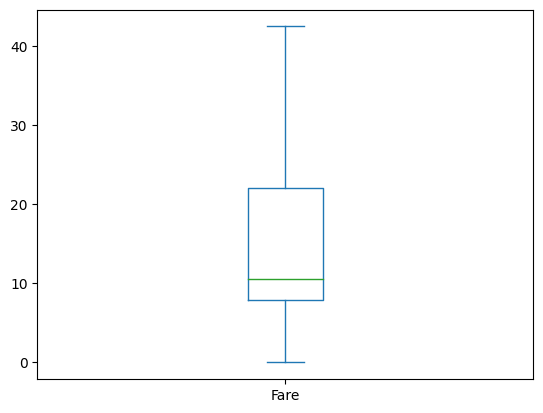

In [ ]:
### Fare 컬럼 --> 5번째 이상치 확인 및 제거

# 1사분위 값 / 3 사분위 값
q1 = cleaned_df5.loc[:,'Fare'].quantile(q=0.25)
q3 = cleaned_df5.loc[:,'Fare'].quantile(q=0.75)

# 5번째 iqr 추출
iqr = q3 - q1

# 5번째 정상 범위의 최소
min = q1 - (1.5*iqr)
print(f'5번째 정상 범위의 최대값 : \n{min}')

print('-'*80)

# 5번째 정상 범위의 최대
max = q3 + (1.5*iqr)
print(f'5번째 정상 범위의 최대값 : \n{max}')

print('-'*80)

# 5번째 이상치 인덱스 추출
condition = (cleaned_df5.loc[:,'Fare'] < min) | (cleaned_df5.loc[:,'Fare'] > max)
print(f'5번째 이상치 데이터의 불리언 배열 생성 : \n{condition}')
print('-'*80)
outlier_index = cleaned_df5.loc[:,'Fare'].loc[condition].index
print(f'5번째 이상치 데이터의 인덱스 : \n{outlier_index}')

print('-'*80)

# 5번째 이상치 제거
cleaned_df6 = cleaned_df5.drop(index=outlier_index)
print(f'5번째 이상치 제거 후 남은 데이터 확인 : \n{cleaned_df6}')

print('-'*80)

# 5번째 이상치 제거 후 Fare 컬럼 --> boxplot --> 이상치 확인
cleaned_df6.loc[:,'Fare'].plot(kind='box')
plt.show()

In [ ]:
### 이상치 제거 후 남은 데이터 --> 인덱스 재설정
cleaned_df6.reset_index(drop=True, inplace=True)

# 결과 확인하기
print(cleaned_df6)

      PassengerId  Survived  Pclass                            Name  Gender  \
0               1         0       3         Braund, Mr. Owen Harris    male   
1               3         1       3          Heikkinen, Miss. Laina  female   
2               5         0       3        Allen, Mr. William Henry    male   
3               6         0       3                Moran, Mr. James    male   
4               8         0       3  Palsson, Master. Gosta Leonard    male   
...           ...       ...     ...                             ...     ...   
1048         1304         1       3  Henriksson, Miss. Jenny Lovisa  female   
1049         1305         0       3              Spector, Mr. Woolf    male   
1050         1307         0       3    Saether, Mr. Simon Sivertsen    male   
1051         1308         0       3             Ware, Mr. Frederick    male   
1052         1309         0       3        Peter, Master. Michael J    male   

     Age  SibSp  Parch              Ticket     Fare

### Feature Engineering

#### 가족 인원수 컬럼 추가

In [ ]:
### SibSp 컬럼 값과 Parch 컬럼 값을 합 --> 가족 인원수 컬럼 생성 --> 파생 변수

# SibSp 컬럼 값과 Parch 컬럼 값 --> 합
data = cleaned_df6.loc[:,'SibSp'] + cleaned_df6.loc[:,'Parch']
print(data)

print('-'*80)

# 새로운 컬럼 추가
cleaned_df6.loc[:,'num_family'] = data

# 결과 확인하기
print(cleaned_df)

0       1
1       0
2       0
3       0
4       4
       ..
1048    0
1049    0
1050    0
1051    0
1052    2
Length: 1053, dtype: int64
--------------------------------------------------------------------------------
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender Age  SibSp  \
0                               Braund, Mr. Owen Harris    male   2      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   3      1   
2                                Heikkinen, Miss. Laina  female   2      0   
3

In [ ]:
### Fare 컬럼 --> 이상치 제거(X)
### SibSp 컬럼 값과 Parch 컬럼 값을 합 --> 가족 인원수 컬럼 생성 --> 파생 변수

# SibSp 컬럼 값과 Parch 컬럼 값 --> 합
data = cleaned_df.loc[:, 'SibSp'] + cleaned_df.loc[:, 'Parch']
print(data)

print('-'*80)

# 새로운 컬럼 추가
cleaned_df.loc[:, 'num_family'] = data

# 결과 확인하기
print(cleaned_df)

0       1
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Length: 1309, dtype: int64
--------------------------------------------------------------------------------
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender Age  SibSp  \
0                               Braund, Mr. Owen Harris    male   2      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   3      1   
2                                Heikkinen, Miss. Laina  female   2      0   
3

#### Name 컬럼 세분화

In [ ]:
### Name 컬럼 확인하기

'''
### 이름의 구성 : 성, 호칭, 이름
'''

# Name 컬럼의 값 확인
print(cleaned_df6.loc[:,'Name'])

0              Braund, Mr. Owen Harris
1               Heikkinen, Miss. Laina
2             Allen, Mr. William Henry
3                     Moran, Mr. James
4       Palsson, Master. Gosta Leonard
                     ...              
1048    Henriksson, Miss. Jenny Lovisa
1049                Spector, Mr. Woolf
1050      Saether, Mr. Simon Sivertsen
1051               Ware, Mr. Frederick
1052          Peter, Master. Michael J
Name: Name, Length: 1053, dtype: object


In [ ]:
### '호칭' 추출 --> split() 함수

'''
### split() 함수
(예시)
name = 'Braund, Mr. Owen Harris'
name.split(',')[1].split('.')[0]
'''

# test name 생성
test_name = cleaned_df6.loc[:,'Name'].iloc[0]
print(test_name)

print('-'*80)

# 첫번째 분할 --> 기준 : ','
result1 = test_name.split(',')
print(f'첫번째 분할의 결과 : {result1}')

print('-'*80)

# '성'을 제외한 나머지 부분 추출 --> 인덱싱 --> test_name.split(',')[1]
print(test_name.split(',')[1])

# 나머지 부분 --> '호칭' 추출
result2 = test_name.split(',')[1].split('.')
print(f'두번째 분할의 결과 : {result2}')
print('-'*80)
title = test_name.split(',')[1].split('.')[0]
print(f'추출한 호칭 확인 : {title}')

Braund, Mr. Owen Harris
--------------------------------------------------------------------------------
첫번째 분할의 결과 : ['Braund', ' Mr. Owen Harris']
--------------------------------------------------------------------------------
 Mr. Owen Harris
두번째 분할의 결과 : [' Mr', ' Owen Harris']
--------------------------------------------------------------------------------
추출한 호칭 확인 :  Mr


In [ ]:
### 문자열의 앞/뒤 공백 제거 --> strip() 함수

# 추출된 호칭에 strip 함수 적용
result = title.strip()
print(result)

Mr


In [ ]:
### Name 컬럼 --> 호칭 추출 함수 정의
def extract_title(name):
    # ','로 split & 두번째 성분 원소 선택 & '.'로 split & 첫번째 성분 원소 선택 & strip 함수
    title = name.split(',')[1].split('.')[0].strip()
    return title

In [ ]:
### Name 컬럼으로부터 호칭을 추출하여 새로운 컬럼 생성 --> 파생 변수

# Name 컬럼 --> apply(extract_title) 적용
data = cleaned_df6.loc[:,'Name'].apply(extract_title)
print(f'호칭 추출의 결과 확인 : \n{data}')

# 새로운 컬럼 생성
cleaned_df6.loc[:,'title'] = data

# 결과 확인하기
print(cleaned_df6)

호칭 추출의 결과 확인 : 
0           Mr
1         Miss
2           Mr
3           Mr
4       Master
         ...  
1048      Miss
1049        Mr
1050        Mr
1051        Mr
1052    Master
Name: Name, Length: 1053, dtype: object
      PassengerId  Survived  Pclass                            Name  Gender  \
0               1         0       3         Braund, Mr. Owen Harris    male   
1               3         1       3          Heikkinen, Miss. Laina  female   
2               5         0       3        Allen, Mr. William Henry    male   
3               6         0       3                Moran, Mr. James    male   
4               8         0       3  Palsson, Master. Gosta Leonard    male   
...           ...       ...     ...                             ...     ...   
1048         1304         1       3  Henriksson, Miss. Jenny Lovisa  female   
1049         1305         0       3              Spector, Mr. Woolf    male   
1050         1307         0       3    Saether, Mr. Simon Sivertsen 

In [ ]:
### Fare 컬럼 --> 이상치(X)
### Name 컬럼으로부터 호칭을 추출하여 새로운 컬럼 생성 --> 파생 변수

# Name 컬럼 --> apply(extract_title) 적용
data = cleaned_df.loc[:,'Name'].apply(extract_title)
print(f'호칭 추출의 결과 확인 : \n{data}')

# 새로운 컬럼 생성
cleaned_df.loc[:,'title'] = data

# 결과 확인하기
print(cleaned_df)

호칭 추출의 결과 확인 : 
0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object
      PassengerId  Survived  Pclass  \
0               1         0       3   
1               2         1       1   
2               3         1       3   
3               4         1       1   
4               5         0       3   
...           ...       ...     ...   
1304         1305         0       3   
1305         1306         1       1   
1306         1307         0       3   
1307         1308         0       3   
1308         1309         0       3   

                                                   Name  Gender Age  SibSp  \
0                               Braund, Mr. Owen Harris    male   2      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female   3      1   
2                                Heikkinen, Miss. Laina  female   2      0  

In [ ]:
### title 컬럼의 항목별 빈도수 / 비율 확인

'''
# 호칭 정리
  1) 'Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir' : 직위 표현
  2) 'Ms', 'Mme', 'Mrs', 'Dona' : 여성 표현
  3) 'Miss', 'Mlle', 'Lady' : 젊은 여성 표현
  4) 'Mr', 'Don' : 남성 표현
  5) 'Master' : 주로 청소년 이하 결혼하지 않은 남성
  6) 'Jonkheer', 'the Countess' : 귀족 표현
'''

# 빈도수 추출
counts = cleaned_df6.loc[:,'title'].value_counts()
print(f'title 컬럼의 항목별 빈도수 : \n{counts}')

print('-'*80)

# 비율 추출
ratio = cleaned_df6.loc[:,'title'].value_counts(normalize=True)
print(f'title 컬럼의 항목별 비율 : \n{ratio}')


title 컬럼의 항목별 빈도수 : 
Mr          652
Miss        201
Mrs         126
Master       51
Rev           8
Dr            5
Col           3
Ms            2
Major         2
Don           1
Lady          1
Jonkheer      1
Name: title, dtype: int64
--------------------------------------------------------------------------------
title 컬럼의 항목별 비율 : 
Mr          0.619183
Miss        0.190883
Mrs         0.119658
Master      0.048433
Rev         0.007597
Dr          0.004748
Col         0.002849
Ms          0.001899
Major       0.001899
Don         0.000950
Lady        0.000950
Jonkheer    0.000950
Name: title, dtype: float64


In [ ]:
### Fare 컬럼 --> 이상치(X)
### title 컬럼의 항목별 빈도수 / 비율 확인

'''
# 호칭 정리
  1) 'Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir' : 직위 표현
  2) 'Ms', 'Mme', 'Mrs', 'Dona' : 여성 표현
  3) 'Miss', 'Mlle', 'Lady' : 젊은 여성 표현
  4) 'Mr', 'Don' : 남성 표현
  5) 'Master' : 주로 청소년 이하 결혼하지 않은 남성
  6) 'Jonkheer', 'the Countess' : 귀족 표현
'''

# 빈도수 추출
counts = cleaned_df.loc[:,'title'].value_counts()
print(f'title 컬럼의 항목별 빈도수 : \n{counts}')

print('-'*80)

# 비율 추출
ratio = cleaned_df.loc[:,'title'].value_counts(normalize=True)
print(f'title 컬럼의 항목별 비율 : \n{ratio}')


title 컬럼의 항목별 빈도수 : 
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: title, dtype: int64
--------------------------------------------------------------------------------
title 컬럼의 항목별 비율 : 
Mr              0.578304
Miss            0.198625
Mrs             0.150497
Master          0.046600
Rev             0.006112
Dr              0.006112
Col             0.003056
Mlle            0.001528
Major           0.001528
Ms              0.001528
Lady            0.000764
Sir             0.000764
Mme             0.000764
Don             0.000764
Capt            0.000764
the Countess    0.000764
Jonkheer        0.000764
Dona            0.000764
Name: title, dtype: float64


#### title 컬럼 정리

In [ ]:
### 목표 : title 컬럼에서 Mr 또는 Miss 또는 Mrs 또는 Master가 아닌 값 --> others로 변환

# 비교 연산자 --> 불리언 배열 생성
condition1 = (cleaned_df6.loc[:,'title'] != 'Mr')
condition2 = (cleaned_df6.loc[:,'title'] != 'Miss')
condition3 = (cleaned_df6.loc[:,'title'] != 'Mrs')
condition4 = (cleaned_df6.loc[:,'title'] != 'Master')

# 논리 연산자 --> 교집합
condition = condition1 & condition2 & condition3 & condition4

# df.loc[condition,'title'] = 'others' 적용
cleaned_df6.loc[condition,'title'] = 'others'

# 결과 확인하기 --< 'title' 컬럼 --> 항목별 빈도수 / 비율 추출
counts = cleaned_df6.loc[:,'title'].value_counts()
print(f'title 컬럼을 정리한 결과 학인(빈도수) : \n{counts}')
print('-'*80)
ratio = cleaned_df6.loc[:,'title'].value_counts(normalize=True)
print(f'title 컬럼을 정리한 결과 학인(비율) : \n{ratio}')

title 컬럼을 정리한 결과 학인(빈도수) : 
Mr        652
Miss      201
Mrs       126
Master     51
others     23
Name: title, dtype: int64
--------------------------------------------------------------------------------
title 컬럼을 정리한 결과 학인(비율) : 
Mr        0.619183
Miss      0.190883
Mrs       0.119658
Master    0.048433
others    0.021842
Name: title, dtype: float64


In [ ]:
### Fare 컬럼 --> 이상치(X)
### 목표 : title 컬럼에서 Mr 또는 Miss 또는 Mrs 또는 Master가 아닌 값 --> others로 변환

# 비교 연산자 --> 불리언 배열 생성
condition1 = (cleaned_df.loc[:,'title'] != 'Mr')
condition2 = (cleaned_df.loc[:,'title'] != 'Miss')
condition3 = (cleaned_df.loc[:,'title'] != 'Mrs')
condition4 = (cleaned_df.loc[:,'title'] != 'Master')

# 논리 연산자 --> 교집합
condition = condition1 & condition2 & condition3 & condition4

# df.loc[condition,'title'] = 'others' 적용
cleaned_df.loc[condition,'title'] = 'others'

# 결과 확인하기 --< 'title' 컬럼 --> 항목별 빈도수 / 비율 추출
counts = cleaned_df.loc[:,'title'].value_counts()
print(f'title 컬럼을 정리한 결과 학인(빈도수) : \n{counts}')
print('-'*80)
ratio = cleaned_df.loc[:,'title'].value_counts(normalize=True)
print(f'title 컬럼을 정리한 결과 학인(비율) : \n{ratio}')

title 컬럼을 정리한 결과 학인(빈도수) : 
Mr        757
Miss      260
Mrs       197
Master     61
others     34
Name: title, dtype: int64
--------------------------------------------------------------------------------
title 컬럼을 정리한 결과 학인(비율) : 
Mr        0.578304
Miss      0.198625
Mrs       0.150497
Master    0.046600
others    0.025974
Name: title, dtype: float64


In [ ]:
### 보충 : title 컬럼에서 Mr 또는 Miss 또는 Mrs 또는 Master가 아닌 값 --> others로 변환 (2)

# 데이터프레임 복사
df_test = cleaned_df6.iloc[:,:]
# print(df_test)

# replace() 함수 사용 --> 호칭 변환
df_test.loc[:,'title'].replace({'Rev':'others',
                                'Dr':'others',
                                'Col':'others',
                                'Ms':'others',
                                'Major':'others',
                                'Don':'others',
                                'Lady':'others',
                                'Jonkheer':'others'})

# 결과 확인하기
print(df_test.loc[:,'title'].value_counts())

Mr        652
Miss      201
Mrs       126
Master     51
others     23
Name: title, dtype: int64


### 불필요한 컬럼 삭제

In [ ]:
### 삭제의 대상 : PassengerId, Name, Ticket
df = cleaned_df6.drop(columns=['PassengerId', 'Name', 'Ticket'])

# 결과 학인하기
print(df)


      Survived  Pclass  Gender Age  SibSp  Parch     Fare Embarked  \
0            0       3    male   2      1      0   7.2500        S   
1            1       3  female   2      0      0   7.9250        S   
2            0       3    male   3      0      0   8.0500        S   
3            0       3    male   2      0      0   8.4583        Q   
4            0       3    male   0      3      1  21.0750        S   
...        ...     ...     ...  ..    ...    ...      ...      ...   
1048         1       3  female   2      0      0   7.7750        S   
1049         0       3    male   2      0      0   8.0500        S   
1050         0       3    male   3      0      0   7.2500        S   
1051         0       3    male   2      0      0   8.0500        S   
1052         0       3    male   2      1      1  22.3583        C   

      num_family   title  
0              1      Mr  
1              0    Miss  
2              0      Mr  
3              0      Mr  
4              4  Master

In [ ]:
### Fare 컬럼 --> 이상치 제거 (X)
### 삭제의 대상 : PassengerId, Name, Ticket
df = cleaned_df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# 결과 학인하기
print(df)

      Survived  Pclass  Gender Age  SibSp  Parch      Fare Embarked  \
0            0       3    male   2      1      0    7.2500        S   
1            1       1  female   3      1      0   71.2833        C   
2            1       3  female   2      0      0    7.9250        S   
3            1       1  female   3      1      0   53.1000        S   
4            0       3    male   3      0      0    8.0500        S   
...        ...     ...     ...  ..    ...    ...       ...      ...   
1304         0       3    male   2      0      0    8.0500        S   
1305         1       1  female   3      0      0  108.9000        C   
1306         0       3    male   3      0      0    7.2500        S   
1307         0       3    male   2      0      0    8.0500        S   
1308         0       3    male   2      1      1   22.3583        C   

      num_family   title  
0              1      Mr  
1              1     Mrs  
2              0    Miss  
3              1     Mrs  
4           

### 결과 저장하기

In [ ]:
### 전처리한 결과를 csv 파일로 저장하기

# 이상치 제거 버전 저장 경로 설정하기
file_path1 = '/content/drive/MyDrive/데이터 분석/titanic_preprocessed.csv'

# 이상치 제거를 하지 않은 버전 저장 경로 설정하기
file_path2 = '/content/drive/MyDrive/데이터 분석/titanic_preprocessed2.csv'

# df.to_csv() 함수 사용
df.to_csv(file_path2, index=False)

In [ ]:
### 저장된 결과 불러오기

# 이상치 제거 버전 파일 경로 설정하기
file_path1 = '/content/drive/MyDrive/데이터 분석/titanic_preprocessed.csv'

# 이상치 제거를 하지 않은 버전 저장 경로 설정하기
file_path2 = '/content/drive/MyDrive/데이터 분석/titanic_preprocessed2.csv'

# pd.read_csv() 함수 사용
df = pd.read_csv(file_path2)

# 결과 확인하기
print(df)

      Survived  Pclass  Gender  Age  SibSp  Parch      Fare Embarked  \
0            0       3    male    2      1      0    7.2500        S   
1            1       1  female    3      1      0   71.2833        C   
2            1       3  female    2      0      0    7.9250        S   
3            1       1  female    3      1      0   53.1000        S   
4            0       3    male    3      0      0    8.0500        S   
...        ...     ...     ...  ...    ...    ...       ...      ...   
1304         0       3    male    2      0      0    8.0500        S   
1305         1       1  female    3      0      0  108.9000        C   
1306         0       3    male    3      0      0    7.2500        S   
1307         0       3    male    2      0      0    8.0500        S   
1308         0       3    male    2      1      1   22.3583        C   

      num_family   title  
0              1      Mr  
1              1     Mrs  
2              0    Miss  
3              1     Mrs  


## 데이터 탐색

In [ ]:
### 이미지의 크기 재설정
plt.rcParams['figure.figsize'] = [4, 3]

### Survived 컬럼

In [ ]:
### 사망자 수 / 생존자 수 분포 시각화

# 빈도수 추출
counts = df.loc[:,'Survived'].value_counts()
print(f'이상치 제거 후 사망자 / 생존자 빈도수 확인 : \n{counts}')

print('-'*80)

# 비율 추출
ratio = df.loc[:,'Survived'].value_counts(normalize=True)
print(f'이상치 제거 후 사망자 / 생존자 비율 확인 : \n{ratio}')


이상치 제거 후 사망자 / 생존자 빈도수 확인 : 
0    815
1    494
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
이상치 제거 후 사망자 / 생존자 비율 확인 : 
0    0.622613
1    0.377387
Name: Survived, dtype: float64


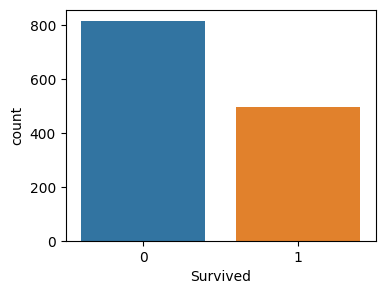

In [ ]:
### 사망자 / 생존자 분포 시각화

# 범주형 데이터의 항목별 빈도수 시각화 --> 막대 그래프
sns.countplot(data=df, x='Survived')
plt.show()

### 생존 여부와 승객의 등급 분석

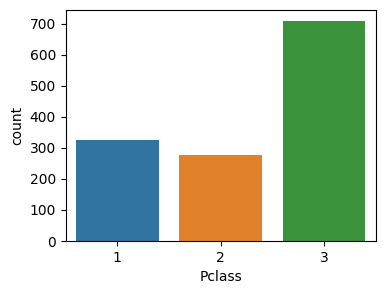

--------------------------------------------------------------------------------
승객의 등급별 빈도수 : 
3    709
1    323
2    277
Name: Pclass, dtype: int64
--------------------------------------------------------------------------------
승객의 등급별 비율 : 
3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64


In [ ]:
### 탑승객의 등급 분석

# 시각화 --> 범주형 데이터 --> 항목별 빈도수 --> sns.countplot(data, x)
sns.countplot(data=df, x='Pclass')
plt.show()

print('-'*80)

# 통계 데이터 - 승객의 등급별 빈도수 추출
counts = df.loc[:,'Pclass'].value_counts()
print(f'승객의 등급별 빈도수 : \n{counts}')

print('-'*80)

# 통계 데이터 - 승객의 등급별 비율 추출
ratio = df.loc[:,'Pclass'].value_counts(normalize=True)
print(f'승객의 등급별 비율 : \n{ratio}')

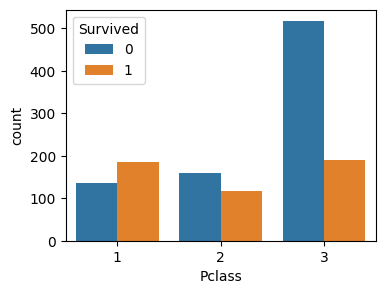

In [ ]:
### Survived 컬럼과 Pclass 컬럼의 관계 분석
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

In [ ]:
### 승객의 등급별 사망자 / 생존자 수와 비율 분석

'''
전체 탑승객 중 사망자 / 생존자 비율 --> 67.8 : 32.2
'''

## 1등석의 사망자 / 생존자 수와 비율 분석

# 1등석 --> 사망자 / 생존자 수 분석
# 비교 연산자 --> 불리언 배열 생성 --> loc[불리언 배열, 'Survived']
condition1 = (df.loc[:,'Pclass']==1)
pclass_survived = df.loc[condition1,'Survived'].value_counts()
print(f'1등석 승객중 사망자 수 / 생존자 수 분석 : \n{pclass_survived}')

print('-'*80)

# 1등석 --> 사망자 / 생존자 비율 분석
# 비교 연산자 --> 불리언 배열 생성 --> loc[불리언 배열, 'Survived']
condition1 = (df.loc[:,'Pclass']==1)
pclass_survived_ratio = df.loc[condition1,'Survived'].value_counts(normalize=True)
print(f'1등석 승객중 사망자 수 / 생존자 비율 분석 : \n{pclass_survived_ratio}')

print('-'*80)

# 2등석 --> 사망자 / 생존자 수 분석
# 비교 연산자 --> 불리언 배열 생성 --> loc[불리언 배열, 'Survived']
condition1 = (df.loc[:,'Pclass']==2)
pclass2_survived = df.loc[condition1,'Survived'].value_counts()
print(f'2등석 승객중 사망자 수 / 생존자 수 분석 : \n{pclass2_survived}')

print('-'*80)

# 2등석 --> 사망자 / 생존자 비율 분석
# 비교 연산자 --> 불리언 배열 생성 --> loc[불리언 배열, 'Survived']
condition1 = (df.loc[:,'Pclass']==2)
pclass2_survived_ratio = df.loc[condition1,'Survived'].value_counts(normalize=True)
print(f'2등석 승객중 사망자 수 / 생존자 비율 분석 : \n{pclass2_survived_ratio}')

print('-'*80)

# 3등석 --> 사망자 / 생존자 수 분석
# 비교 연산자 --> 불리언 배열 생성 --> loc[불리언 배열, 'Survived']
condition1 = (df.loc[:,'Pclass']==3)
pclass3_survived = df.loc[condition1,'Survived'].value_counts()
print(f'3등석 승객중 사망자 수 / 생존자 수 분석 : \n{pclass3_survived}')

print('-'*80)

# 3등석 --> 사망자 / 생존자 비율 분석
# 비교 연산자 --> 불리언 배열 생성 --> loc[불리언 배열, 'Survived']
condition1 = (df.loc[:,'Pclass']==3)
pclass3_survived_ratio = df.loc[condition1,'Survived'].value_counts(normalize=True)
print(f'3등석 승객중 사망자 수 / 생존자 비율 분석 : \n{pclass3_survived_ratio}')

1등석 승객중 사망자 수 / 생존자 수 분석 : 
1    186
0    137
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
1등석 승객중 사망자 수 / 생존자 비율 분석 : 
1    0.575851
0    0.424149
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
2등석 승객중 사망자 수 / 생존자 수 분석 : 
0    160
1    117
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
2등석 승객중 사망자 수 / 생존자 비율 분석 : 
0    0.577617
1    0.422383
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
3등석 승객중 사망자 수 / 생존자 수 분석 : 
0    518
1    191
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
3등석 승객중 사망자 수 / 생존자 비율 분석 : 
0    0.730606
1    0.269394
Name: Survived, dtype: float64


### 생존 여부와 성별의 관계 분석

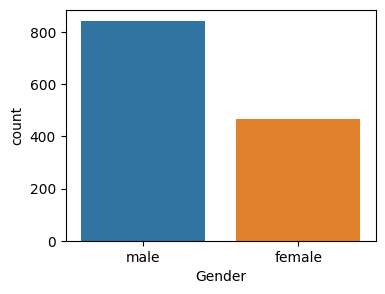

--------------------------------------------------------------------------------
Gender 컬럼의 남여 빈도수 : 
male      843
female    466
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
Gender 컬럼의 남여 비율 : 
male      0.644003
female    0.355997
Name: Gender, dtype: float64


In [ ]:
### 전체 탑승객 --> 남여의 빈도수 분석

# 시각화
sns.countplot(data=df, x='Gender')
plt.show()

print('-'*80)

# 통계 분석 --> 성별 빈도수 추출
counts = df.loc[:,'Gender'].value_counts()
print(f'Gender 컬럼의 남여 빈도수 : \n{counts}')

print('-'*80)

# 통계 분석 --> 성별 비율 추출
ratio = df.loc[:,'Gender'].value_counts(normalize=True)
print(f'Gender 컬럼의 남여 비율 : \n{ratio}')

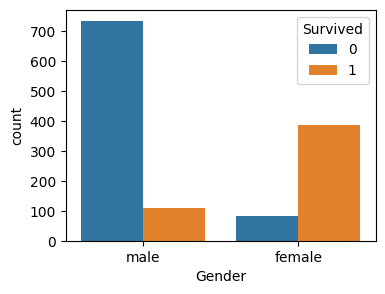

In [ ]:
### Survived 컬럼과 Gender 컬럼의 관계 (1)
sns.countplot(data=df, x='Gender', hue='Survived')
plt.show()

In [ ]:
### 성별 생존자 / 사망자의 수와 비율 분석


## 대상 : 여성
# 여성 --> 사망자 / 생존자수 추출
condition1 = (df.loc[:,'Gender']=='female')
female_survived_counts = df.loc[condition1,'Survived'].value_counts()
print(f'여성 중 사망자 / 생존자 수 : \n{female_survived_counts}')

print('-'*80)

# 여성 --> 사망자 / 생존자 비율 추출
condition1 = (df.loc[:,'Gender']=='female')
female_survived_ratio = df.loc[condition1,'Survived'].value_counts(normalize=True)
print(f'여성 중 사망자 / 생존자 비율 : \n{female_survived_ratio}')

print('-'*80)

## 대상 : 남성
# 남성 --> 사망자 / 생존자수 추출
condition2 = (df.loc[:,'Gender']=='male')
male_survived_counts = df.loc[condition2,'Survived'].value_counts()
print(f'남성 중 사망자 / 생존자 수 : \n{male_survived_counts}')

print('-'*80)

# 남성 --> 사망자 / 생존자 비율 추출
condition2 = (df.loc[:,'Gender']=='male')
male_survived_ratio = df.loc[condition2,'Survived'].value_counts(normalize=True)
print(f'남성 중 사망자 / 생존자 비율 : \n{male_survived_ratio}')

여성 중 사망자 / 생존자 수 : 
1    385
0     81
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
여성 중 사망자 / 생존자 비율 : 
1    0.82618
0    0.17382
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
남성 중 사망자 / 생존자 수 : 
0    734
1    109
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
남성 중 사망자 / 생존자 비율 : 
0    0.8707
1    0.1293
Name: Survived, dtype: float64


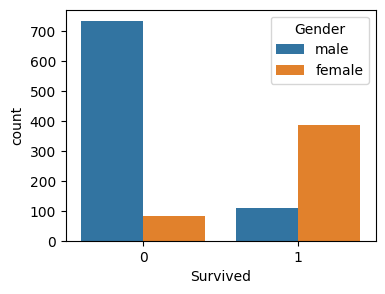

In [ ]:
### Survived 컬럼과 Gender 컬럼의 관계 (2)
sns.countplot(data=df, x='Survived', hue='Gender')
plt.show()

In [ ]:
### 생존자 / 사망자의 성별 분석

## 대상 : 사망자

# 사망자 --> 남여의 빈도수 추출
condition1 = (df.loc[:,'Survived']==0)
dead_gender_counts = df.loc[condition1,'Gender'].value_counts()
print(f'사망자 중 남여의 수 : \n{dead_gender_counts}')

print('-'*80)

# 사망자 --> 남여의 비율 추출
condition1 = (df.loc[:,'Survived']==0)
dead_gender_ratio = df.loc[condition1,'Gender'].value_counts(normalize=True)
print(f'사망자 중 남여의 비율 : \n{dead_gender_ratio}')

## 대상 : 생존자

# 생존자 --> 남여의 빈도수 추출
condition2 = (df.loc[:,'Survived']==1)
alive_gender_counts = df.loc[condition2,'Gender'].value_counts()
print(f'생존자 중 남여의 수 : \n{alive_gender_counts}')

print('-'*80)

# 생존자 --> 남여의 비율 추출
condition2 = (df.loc[:,'Survived']==1)
alive_gender_ratio = df.loc[condition2,'Gender'].value_counts(normalize=True)
print(f'사망자 중 남여의 비율 : \n{alive_gender_ratio}')

사망자 중 남여의 수 : 
male      734
female     81
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
사망자 중 남여의 비율 : 
male      0.900613
female    0.099387
Name: Gender, dtype: float64
생존자 중 남여의 수 : 
female    385
male      109
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
사망자 중 남여의 비율 : 
female    0.779352
male      0.220648
Name: Gender, dtype: float64


### 생존 여부와 연령의 관계 분석

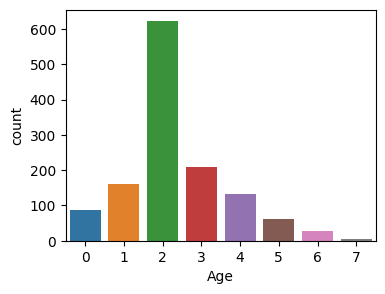

--------------------------------------------------------------------------------
탑승객의 연령별 빈도수 : 
2    624
3    210
1    162
4    132
0     86
5     62
6     27
7      6
Name: Age, dtype: int64
--------------------------------------------------------------------------------
탑승객의 연령별 비율 : 
2    0.476700
3    0.160428
1    0.123759
4    0.100840
0    0.065699
5    0.047364
6    0.020626
7    0.004584
Name: Age, dtype: float64


In [ ]:
### 탑승객의 연령 시각화
sns.countplot(data=df, x='Age')
plt.show()

print('-'*80)

# 통계 분석 --> 탑승객의 연령별 빈도수 추출
counts = df.loc[:,'Age'].value_counts()
print(f'탑승객의 연령별 빈도수 : \n{counts}')

print('-'*80)

# 통계 분석 --> 탑승객의 연령별 비율 추출
ratio = df.loc[:,'Age'].value_counts(normalize=True)
print(f'탑승객의 연령별 비율 : \n{ratio}')

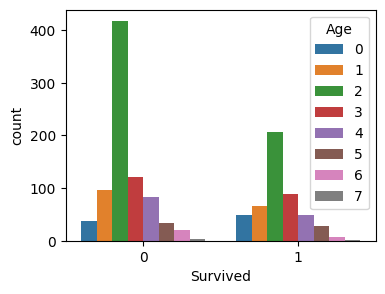

In [ ]:
### Survived 컬럼과 Age 컬럼의 관계 확인 (1)
sns.countplot(data=df, x='Survived', hue='Age')
plt.show()

In [ ]:
### 사망자 / 생존자의 연령 분석

## 대상 : 사망자

# 사망자의 연령별 빈도수 추출
condition1 = (df.loc[:,'Survived']==0)
dead_age_counts = df.loc[condition1, 'Age'].value_counts()
print(f'사망자의 연령별 빈도수 : \n{dead_age_counts}')

print('-'*80)

# 사망자의 연령별 비율 추출
condition1 = (df.loc[:,'Survived']==0)
dead_age_ratio = df.loc[condition1, 'Age'].value_counts(normalize=True)
print(f'사망자의 연령별 비율 : \n{dead_age_ratio}')

print('-'*80)

## 대상 : 생존자

# 생존자의 연령별 빈도수 추출
condition2 = (df.loc[:,'Survived']==1)
alive_age_counts = df.loc[condition2, 'Age'].value_counts()
print(f'생존자의 연령별 빈도수 : \n{alive_age_counts}')

print('-'*80)

# 생존자의 연령별 비율 추출
condition2 = (df.loc[:,'Survived']==1)
alive_age_ratio = df.loc[condition2, 'Age'].value_counts(normalize=True)
print(f'생존자의 연령별 비율 : \n{alive_age_ratio}')

사망자의 연령별 빈도수 : 
2    418
3    121
1     96
4     84
0     38
5     34
6     20
7      4
Name: Age, dtype: int64
--------------------------------------------------------------------------------
사망자의 연령별 비율 : 
2    0.512883
3    0.148466
1    0.117791
4    0.103067
0    0.046626
5    0.041718
6    0.024540
7    0.004908
Name: Age, dtype: float64
--------------------------------------------------------------------------------
생존자의 연령별 빈도수 : 
2    206
3     89
1     66
0     48
4     48
5     28
6      7
7      2
Name: Age, dtype: int64
--------------------------------------------------------------------------------
생존자의 연령별 비율 : 
2    0.417004
3    0.180162
1    0.133603
0    0.097166
4    0.097166
5    0.056680
6    0.014170
7    0.004049
Name: Age, dtype: float64


In [ ]:
### 사망자 / 생존자 연령 분석의 결과 통합
df_compare = pd.concat([ratio, dead_age_ratio, alive_age_ratio], axis=1)
df_compare.columns = ['total','dead','alive']
print(df_compare)

      total      dead     alive
2  0.476700  0.512883  0.417004
3  0.160428  0.148466  0.180162
1  0.123759  0.117791  0.133603
4  0.100840  0.103067  0.097166
0  0.065699  0.046626  0.097166
5  0.047364  0.041718  0.056680
6  0.020626  0.024540  0.014170
7  0.004584  0.004908  0.004049


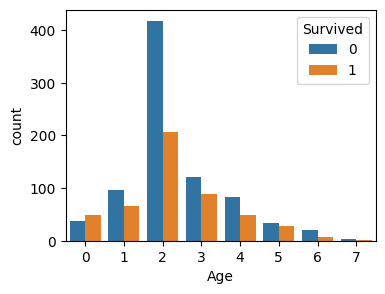

In [ ]:
### Survived 컬럼과 Age 컬럼의 관계 확인 (2)
sns.countplot(data=df, x='Age', hue='Survived')
plt.show()

In [ ]:
### 20대 / 30대 / 10대의 생존 여부 분석

### 대상 : 20대

# 20대 --> 사망자 / 생존자 수 추출
condition1 = (df.loc[:,'Age']==2)
age20_survived_counts = df.loc[condition1,'Survived'].value_counts()
print(f'20대 중 사망자 / 생존자 수 : \n{age20_survived_counts}')

print('-'*80)

# 20대 --> 사망자 / 생존자 비율 추출
condition1 = (df.loc[:,'Age']==2)
age20_survived_ratio = df.loc[condition1,'Survived'].value_counts(normalize=True)
print(f'20대 중 사망자 / 생존자 비율 : \n{age20_survived_ratio}')

print('-'*80)

### 대상 : 30대

# 30대 --> 사망자 / 생존자 수 추출
condition2 = (df.loc[:,'Age']==3)
age30_survived_counts = df.loc[condition2,'Survived'].value_counts()
print(f'30대 중 사망자 / 생존자 수 : \n{age30_survived_counts}')

print('-'*80)

# 30대 --> 사망자 / 생존자 비율 추출
condition2 = (df.loc[:,'Age']==3)
age30_survived_ratio = df.loc[condition2,'Survived'].value_counts(normalize=True)
print(f'30대 중 사망자 / 생존자 비율 : \n{age30_survived_ratio}')

print('-'*80)

### 대상 : 10대

# 10대 --> 사망자 / 생존자 수 추출
condition3 = (df.loc[:,'Age']==1)
age10_survived_counts = df.loc[condition3,'Survived'].value_counts()
print(f'10대 중 사망자 / 생존자 수 : \n{age10_survived_counts}')

print('-'*80)

# 10대 --> 사망자 / 생존자 비율 추출
condition3 = (df.loc[:,'Age']==1)
age10_survived_ratio = df.loc[condition3,'Survived'].value_counts(normalize=True)
print(f'10대 중 사망자 / 생존자 비율 : \n{age10_survived_ratio}')

20대 중 사망자 / 생존자 수 : 
0    418
1    206
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
20대 중 사망자 / 생존자 비율 : 
0    0.669872
1    0.330128
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
30대 중 사망자 / 생존자 수 : 
0    121
1     89
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
30대 중 사망자 / 생존자 비율 : 
0    0.57619
1    0.42381
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
10대 중 사망자 / 생존자 수 : 
0    96
1    66
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
10대 중 사망자 / 생존자 비율 : 
0    0.592593
1    0.407407
Name: Survived, dtype: float64


### 성별과 연령의 관계 분석

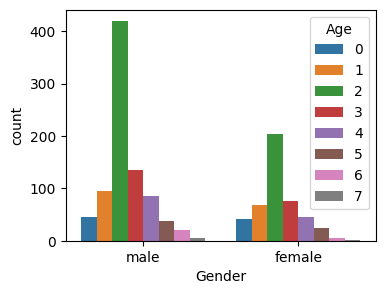

In [ ]:
### Gender 컬럼과 Age 컬럼의 관계 확인 (1) : x='Gender', hue='Age'
sns.countplot(data=df, x='Gender', hue='Age')
plt.show()

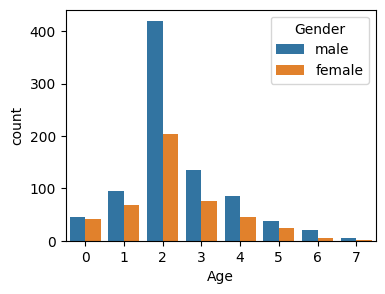

In [ ]:
### Gender 컬럼과 Age 컬럼의 관계 확인 (2) : x='Age', hue='Gender'
sns.countplot(data=df, x='Age', hue='Gender')
plt.show()

In [ ]:
### 20대의 성별 분석

# 20대의 성별 빈도수 추출
condition1 = (df.loc[:,'Age']==2)
age20_gender_counts = df.loc[condition1,'Gender'].value_counts()
print(f'20대 중 남녀의 수 : \n{age20_gender_counts}')

print('-'*80)

# 20대의 성별 비율 추출
condition1 = (df.loc[:,'Age']==2)
age20_gender_ratio = df.loc[condition1,'Gender'].value_counts(normalize=True)
print(f'20대 중 남녀의 비율 : \n{age20_gender_ratio}')

20대 중 남녀의 수 : 
male      420
female    204
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
20대 중 남녀의 비율 : 
male      0.673077
female    0.326923
Name: Gender, dtype: float64


In [ ]:
### 30대의 성별 분석

# 30대의 성별 빈도수 추출
condition2 = (df.loc[:,'Age']==3)
age30_gender_counts = df.loc[condition2,'Gender'].value_counts()
print(f'30대 중 남녀의 수 : \n{age30_gender_counts}')

print('-'*80)

# 30대의 성별 비율 추출
condition2 = (df.loc[:,'Age']==3)
age30_gender_ratio = df.loc[condition2,'Gender'].value_counts(normalize=True)
print(f'30대 중 남녀의 비율 : \n{age30_gender_ratio}')

30대 중 남녀의 수 : 
male      135
female     75
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
30대 중 남녀의 비율 : 
male      0.642857
female    0.357143
Name: Gender, dtype: float64


In [ ]:
### 10대의 성별 분석

# 10대의 성별 빈도수 추출
condition3 = (df.loc[:,'Age']==1)
age10_gender_counts = df.loc[condition3,'Gender'].value_counts()
print(f'10대 중 남녀의 수 : \n{age10_gender_counts}')

print('-'*80)

# 10대의 성별 비율 추출
condition3 = (df.loc[:,'Age']==1)
age10_gender_ratio = df.loc[condition3,'Gender'].value_counts(normalize=True)
print(f'10대 중 남녀의 비율 : \n{age10_gender_ratio}')

10대 중 남녀의 수 : 
male      94
female    68
Name: Gender, dtype: int64
--------------------------------------------------------------------------------
10대 중 남녀의 비율 : 
male      0.580247
female    0.419753
Name: Gender, dtype: float64


### 생존 여부와 요금의 관계 분석

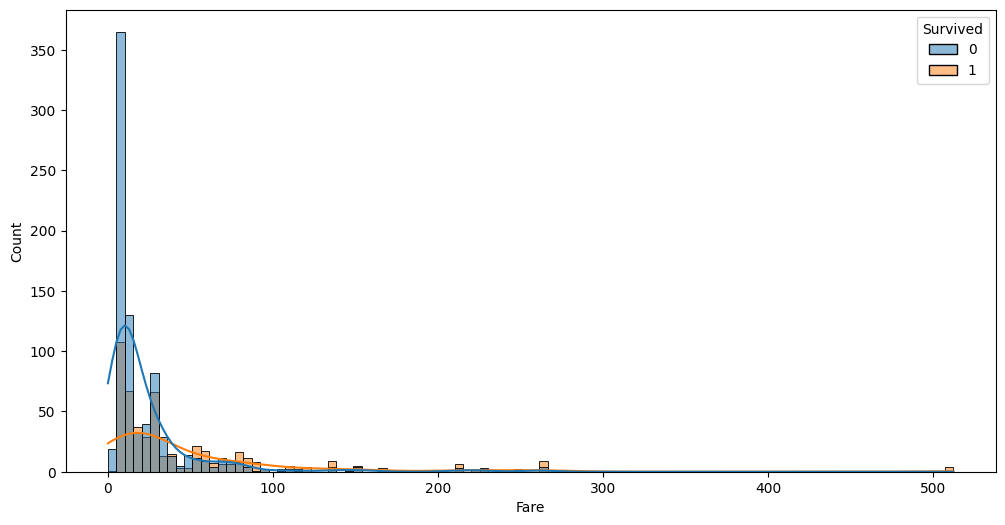

In [ ]:
### Fare 컬럼의 분포 확인

# 이미지 크기 재설정
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='Fare', bins=100, kde=True, hue='Survived')
plt.show()

#### Pclass 컬럼과 Fare 컬럼의 관계 분석

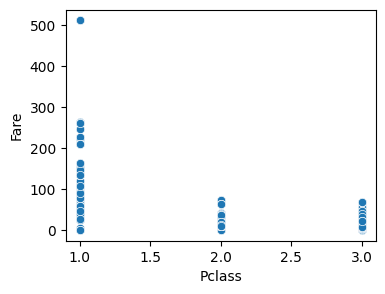

In [ ]:
### Pclass 컬럼과 Fare 컬럼의 관계 시각화
sns.scatterplot(data=df, x='Pclass', y='Fare')
plt.show()

In [ ]:
### 2등석, 3등석 요금의 최대값 추출

# 2등석 요금의 최대값 추출
condition1 = (df.loc[:,'Pclass']==2)
pclass2_fare_max = df.loc[condition1,'Fare'].max()
print(f'2등석 요금의 최대값 : {pclass2_fare_max}')

print('-'*80)

# 3등석 요금의 최대값 추출
condition2 = (df.loc[:,'Pclass']==3)
pclass3_fare_max = df.loc[condition2,'Fare'].max()
print(f'3등석 요금의 최대값 : {pclass3_fare_max}')

2등석 요금의 최대값 : 73.5
--------------------------------------------------------------------------------
3등석 요금의 최대값 : 69.55


In [ ]:
###  요금이 73.5 달러보다 큰 승객 --> 사망자 / 생존자 비율 확인

# 비교 연산 적용
condition = (df.loc[:,'Fare']>73.5)
# print(condition)

# 빈도수 추출
counts = df.loc[condition,'Survived'].value_counts()
print(f'요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 수 : \n{counts}')

print('-'*80)

# 비율 추출
ratio = df.loc[condition,'Survived'].value_counts(normalize=True)
print(f'요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 비율 : \n{ratio}')

요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 수 : 
1    101
0     44
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
요금이 73.5 달러보다 큰 승객의 사망자 / 생존자 비율 : 
1    0.696552
0    0.303448
Name: Survived, dtype: float64


### 생존 여부와 가족 인원수의 관계 분석

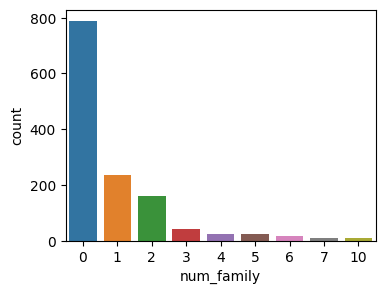

--------------------------------------------------------------------------------
가족 인원수별 빈도수 : 
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: num_family, dtype: int64
--------------------------------------------------------------------------------
가족 인원수별 비율 : 
0     0.603514
1     0.179526
2     0.121467
3     0.032850
5     0.019099
4     0.016807
6     0.012223
10    0.008403
7     0.006112
Name: num_family, dtype: float64


In [ ]:
### 탑승객의 가족 인원수 컬럼 분포 분석

# 시각화
sns.countplot(data=df, x='num_family')
plt.show()

print('-'*80)

# 통계 분석 --> 가족 인원수별 빈도수 추출
counts = df.loc[:,'num_family'].value_counts()
print(f'가족 인원수별 빈도수 : \n{counts}')

print('-'*80)

# 통계 분석 --> 가족 인원수별 비율 추출
ratio = df.loc[:,'num_family'].value_counts(normalize=True)
print(f'가족 인원수별 비율 : \n{ratio}')

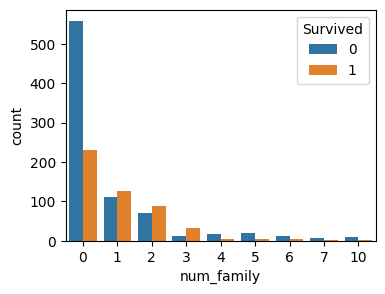

In [ ]:
### Survived 컬럼과 num_family 컬럼의 관계 확인 (1)
sns.countplot(data=df, x='num_family', hue='Survived')
plt.show()

In [ ]:
### 생존 여부와 가족 인원수 분포 분석

## 대상 : 가족 인원수 = 0 --> 사망자 / 생존자 비율
condition1 = (df.loc[:,'num_family']==0)
num0_ratio = df.loc[condition1,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 0인 경우 사망자 / 생존자 비율 : \n{num0_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 1 --> 사망자 / 생존자 비율
condition2 = (df.loc[:,'num_family']==1)
num1_ratio = df.loc[condition2,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 1인 경우 사망자 / 생존자 비율 : \n{num1_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 2 --> 사망자 / 생존자 비율
condition3 = (df.loc[:,'num_family']==2)
num2_ratio = df.loc[condition3,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 2인 경우 사망자 / 생존자 비율 : \n{num2_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 3 --> 사망자 / 생존자 비율
condition4 = (df.loc[:,'num_family']==3)
num3_ratio = df.loc[condition4,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 3인 경우 사망자 / 생존자 비율 : \n{num3_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 4 --> 사망자 / 생존자 비율
condition5 = (df.loc[:,'num_family']==4)
num4_ratio = df.loc[condition5,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 4인 경우 사망자 / 생존자 비율 : \n{num4_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 5 --> 사망자 / 생존자 비율
condition6 = (df.loc[:,'num_family']==5)
num5_ratio = df.loc[condition6,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 5인 경우 사망자 / 생존자 비율 : \n{num5_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 6 --> 사망자 / 생존자 비율
condition7 = (df.loc[:,'num_family']==6)
num6_ratio = df.loc[condition7,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 6인 경우 사망자 / 생존자 비율 : \n{num6_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 7 --> 사망자 / 생존자 비율
condition8 = (df.loc[:,'num_family']==7)
num7_ratio = df.loc[condition8,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 7인 경우 사망자 / 생존자 비율 : \n{num7_ratio}')

print('-'*80)

## 대상 : 가족 인원수 = 10 --> 사망자 / 생존자 비율
condition9 = (df.loc[:,'num_family']==10)
num10_ratio = df.loc[condition9,'Survived'].value_counts(normalize=True)
print(f'동반 가족 인원수가 10인 경우 사망자 / 생존자 비율 : \n{num10_ratio}')

동반 가족 인원수가 0인 경우 사망자 / 생존자 비율 : 
0    0.707595
1    0.292405
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 1인 경우 사망자 / 생존자 비율 : 
1    0.531915
0    0.468085
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 2인 경우 사망자 / 생존자 비율 : 
1    0.559748
0    0.440252
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 3인 경우 사망자 / 생존자 비율 : 
1    0.72093
0    0.27907
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 4인 경우 사망자 / 생존자 비율 : 
0    0.772727
1    0.227273
Name: Survived, dtype: float64
--------------------------------------------------------------------------------
동반 가족 인원수가 5인 경우 사망자 / 생존자 비율 : 
0    0.8
1    0.2
Name: Survived, dtype: float64
-------------------------------------------------------

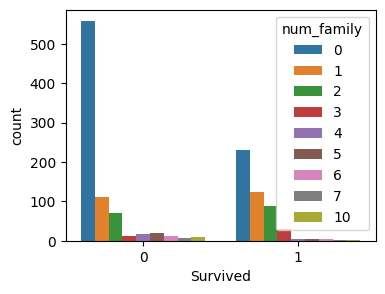

In [ ]:
### Survived 컬럼과 num_family 컬럼의 관계 확인 (2)
sns.countplot(data=df, x='Survived', hue='num_family')
plt.show()

### 생존 여부와 호칭의 관계 분석

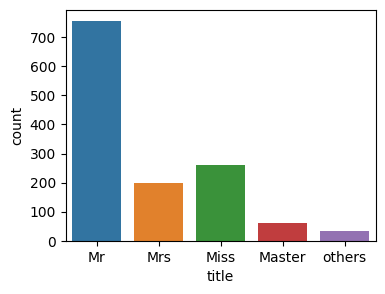

호칭별 빈도수 :
Mr        757
Miss      260
Mrs       197
Master     61
others     34
Name: title, dtype: int64
--------------------------------------------------------------------------------
호칭별 비율 :
Mr        0.578304
Miss      0.198625
Mrs       0.150497
Master    0.046600
others    0.025974
Name: title, dtype: float64


In [ ]:
### 탐승객의 호칭 분포 분석

'''
### title 컬럼 ==> 'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'others':4
'''

sns.countplot(data=df, x='title')
plt.show()

# 통계 분석 --> 호칭별 빈도수 추출
counts = df.loc[:,'title'].value_counts()
print(f'호칭별 빈도수 :\n{counts}')

print('-'*80)

# 통계 분석 --> 호칭별 비율 추출
ratio = df.loc[:,'title'].value_counts(normalize=True)
print(f'호칭별 비율 :\n{ratio}')

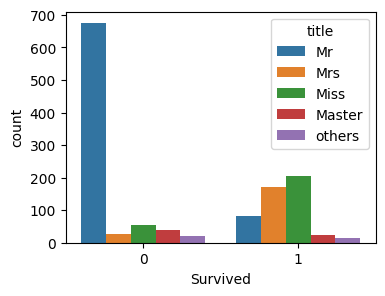

In [ ]:
### Survived 컬럼과 title 컬럼의 관계 확인
sns.countplot(data=df, x='Survived', hue='title')
plt.show()

In [ ]:
### 생존 여부와 호칭별 분포 분석

'''
호칭별 비율 :
Mr        0.578304
Miss      0.198625
Mrs       0.150497
Master    0.046600
others    0.025974
'''

# 대상 : 사망자 --> 호칭별 비율 추출
condition1 = (df.loc[:,'Survived']==0)
dead_title = df.loc[condition1,'title'].value_counts(normalize=True)
print(f'호칭별 사망자 비율 : \n{dead_title}')

print('-'*80)

# 대상 : 생존자 --> 호칭별 비율 추출
condition2 = (df.loc[:,'Survived']==1)
alive_title = df.loc[condition2,'title'].value_counts(normalize=True)
print(f'호칭별 생존자 비율 : \n{alive_title}')

호칭별 사망자 비율 : 
Mr        0.829448
Miss      0.067485
Master    0.046626
Mrs       0.031902
others    0.024540
Name: title, dtype: float64
--------------------------------------------------------------------------------
호칭별 생존자 비율 : 
Miss      0.414980
Mrs       0.346154
Mr        0.163968
Master    0.046559
others    0.028340
Name: title, dtype: float64


In [ ]:
### 생존 여부와 호칭별 분포 --> 데이터프레임 생성

df_title_survive = pd.concat([ratio, dead_title, alive_title], axis=1)

# 컬럼 이름 변경
df_title_survive.columns = ['total', 'dead', 'alive']

# 결과 확인하기
print(df_title_survive)

           total      dead     alive
Mr      0.578304  0.829448  0.163968
Miss    0.198625  0.067485  0.414980
Mrs     0.150497  0.031902  0.346154
Master  0.046600  0.046626  0.046559
others  0.025974  0.024540  0.028340


### 생존 여부와 승선 항구의 관계 분석

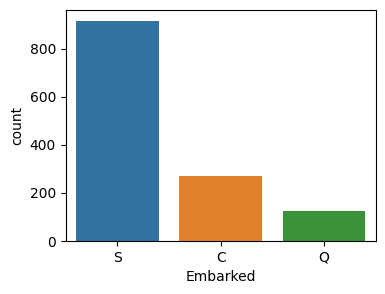

--------------------------------------------------------------------------------
승선 항구별 빈도수 :
S    916
C    270
Q    123
Name: Embarked, dtype: int64
--------------------------------------------------------------------------------
승선 항구별 비율 :
S    0.699771
C    0.206264
Q    0.093965
Name: Embarked, dtype: float64


In [ ]:
### 탐승객의 승선 항구 분석
sns.countplot(data=df, x='Embarked')
plt.show()

print('-'*80)

# 통계 분석 --> 승선 항구별 빈도수 추출
counts = df.loc[:,'Embarked'].value_counts()
print(f'승선 항구별 빈도수 :\n{counts}')

print('-'*80)

# 통계 분석 --> 승선 항구별 비율 추출
ratio = df.loc[:,'Embarked'].value_counts(normalize=True)
print(f'승선 항구별 비율 :\n{ratio}')

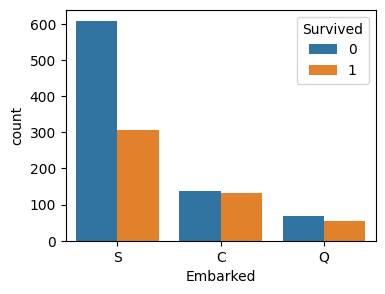

In [ ]:
### 탐승객의 승선 항구 분석
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.show()

In [ ]:
### 생존 여부와 승선 항구별 분포 분석

## 대상자 : 사망자

# 사망자의 항구별 비율 추출
condition1 = (df.loc[:,'Survived']==0)
dead_ratio = df.loc[condition1,'Embarked'].value_counts(normalize=True)
print(f'항구별 사망자 비율 : \n{dead_ratio}')

print('-'*80)

## 대상 : 생존자

# 생존자의 항구별 비율 추출
condition2 = (df.loc[:,'Survived']==1)
alive_ratio = df.loc[condition2,'Embarked'].value_counts(normalize=True)
print(f'항구별 생존자 비율 : \n{alive_ratio}')

항구별 사망자 비율 : 
S    0.747239
C    0.168098
Q    0.084663
Name: Embarked, dtype: float64
--------------------------------------------------------------------------------
항구별 생존자 비율 : 
S    0.621457
C    0.269231
Q    0.109312
Name: Embarked, dtype: float64


In [ ]:
### 생존 여부와 승선 항구별 분포 --> 데이터프레임 생성

# pd.concat() 사용 --> 데이터 프레임 생성
df_sur_embarked = pd.concat([ratio, dead_ratio, alive_ratio], axis=1)

# 컬럼 이름 변경
df_sur_embarked.columns = ['total', 'dead', 'alive']

# 결과 확인하기
print(df_sur_embarked)

      total      dead     alive
S  0.699771  0.747239  0.621457
C  0.206264  0.168098  0.269231
Q  0.093965  0.084663  0.109312


In [ ]:
'''
어우 힘들엇다...
'''

'\n어우 힘들엇다...\n'